In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image
import albumentations
import joblib

In [8]:
train = pd.read_csv('../input/dataset/train.csv')

In [101]:
train.columns

Index(['Image', 'Class'], dtype='object')

In [102]:
train['Class'].unique()

array(['Food', 'misc', 'Attire', 'Decorationandsignage'], dtype=object)

In [103]:
train['Class'].value_counts()

Food                    2278
Attire                  1691
misc                    1271
Decorationandsignage     743
Name: Class, dtype: int64

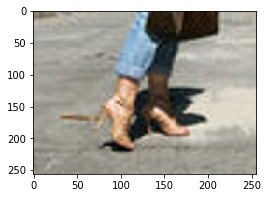

In [40]:
image = Image.open('../input/dataset/Train Images/image4.jpg')
image = image.resize((256,256))
plt.figure(figsize=(4,3))
plt.imshow(image,interpolation='nearest', aspect='auto')

In [13]:
def augment(aug, image):
    return aug(image=image)['image']

def aug_show(aug):
    aug_image = augment(aug, np.array(image))
    plt.figure(figsize=(3,5))
    plt.imshow(aug_image)

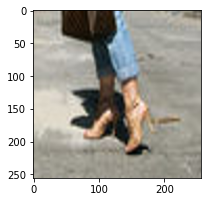

In [106]:
 aug =  albumentations.HorizontalFlip(p=1)
 
 aug_show(aug)

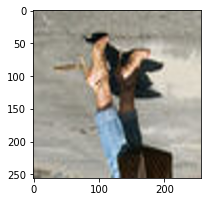

In [107]:
aug =  albumentations.VerticalFlip(p=1)
 
aug_show(aug)

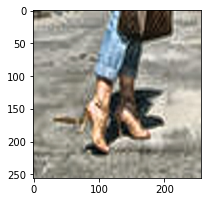

In [108]:
aug =  albumentations.CLAHE(p=1)
 
aug_show(aug)

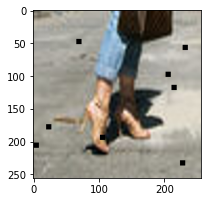

In [109]:
aug =  albumentations.CoarseDropout(p=1)
 
aug_show(aug)

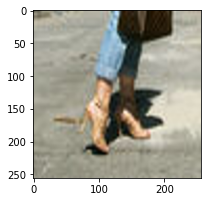

In [110]:
aug =  albumentations.FancyPCA(p=1)
aug_show(aug)

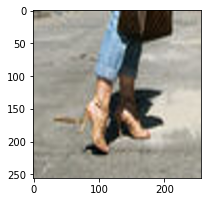

In [111]:
aug =  albumentations.IAAAffine(p=1)
aug_show(aug)

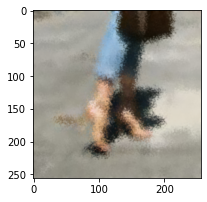

In [112]:
aug =  albumentations.GlassBlur(p=1)
aug_show(aug)

(150, 150, 3)


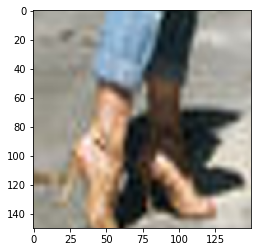

In [113]:
aug =  albumentations.CenterCrop(height=150, width=150,p=1)
aug_image = augment(aug, np.array(image))
print(aug_image.shape)
plt.imshow(aug_image)

In [46]:
def h_flip_blur(p=1.0):
    return albumentations.Compose([
        albumentations.HorizontalFlip(p=p),
        albumentations.Blur(p=p),
        albumentations.GaussNoise(p=p)
    ], p=p)

def v_flib_g_blur(p=1.0):
    return albumentations.Compose([
        albumentations.VerticalFlip(p=p),
        albumentations.GaussianBlur(p=p),
        albumentations.IAAAdditiveGaussianNoise(p=p)
    ], p=p)

def r_ss_roate_m_blur(p=1.0):
    return albumentations.Compose([
        albumentations.ShiftScaleRotate(p=p),
        albumentations.MedianBlur(p=p),
        albumentations.MultiplicativeNoise(p=p)
    ], p=p)

def rgd_shuffle_mo_blur(p=1.0):
    return albumentations.Compose([
        albumentations.ChannelShuffle(p=p),
        albumentations.MotionBlur(p=p),
        albumentations.RandomBrightness(p=1)
    ], p=p)


def c_crop_g_blur(i_height=256, i_width=256,p=1.0):
    return albumentations.Compose([
        albumentations.CenterCrop(height=150, width=150,p=p),
        albumentations.Resize(i_height, i_width),
        albumentations.GlassBlur(p=p),
        albumentations.RandomContrast(p=p)
    ], p=p)

def r_crop_clahe(i_height=256, i_width=256,p=1.0):
    return albumentations.Compose([
        albumentations.RandomCrop(height=150, width=150,p=p),
        albumentations.Resize(i_height, i_width),
        albumentations.CLAHE(p=p),
        albumentations.RandomBrightnessContrast(p=p)
    ], p=p)

def elastic_tranform_r_brightness(p=1.0):
    return albumentations.Compose([
        albumentations.ElasticTransform(p=p),
        albumentations.RandomBrightnessContrast(p=p),
        albumentations.RandomRain(p=p)
    ], p=p)

def pre_porcess(height=256, width=256, p=1.0):
    return albumentations.Compose([
        albumentations.Resize(height, width)
    ], p=p)

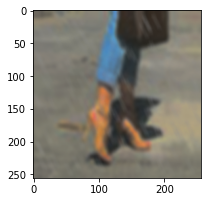

In [52]:
aug = elastic_tranform_r_brightness(p=1.0)

aug_show(aug)


In [53]:
import glob
import os

files = glob.glob('../input/dataset/Train Images/*')[:20]
dataset =[]

counter=0

for file in files:
    file_name = os.path.basename(file)
    label = train[train.Image==file_name].Class.iloc[0]
    image = Image.open(file)
    image = image.convert("RGB")

    #original image
    aug = pre_porcess(256,256)
    image = augment(aug, np.array(image))
    new_file_name = f"image{counter}"
    counter+=1
    joblib.dump(image, f"../input/image_pickles/{new_file_name}.pkl")
    dataset.append((new_file_name, label))

    #augment -1
    aug = h_flip_blur(p=1.0)
    image = augment(aug, np.array(image))
    new_file_name = f"image{counter}"
    counter+=1
    joblib.dump(image, f"../input/image_pickles/{new_file_name}.pkl")
    dataset.append((new_file_name, label))

    #augment -2
    aug = v_flib_g_blur(p=1.0)
    image = augment(aug, np.array(image))
    new_file_name = f"image{counter}"
    counter+=1
    joblib.dump(image, f"../input/image_pickles/{new_file_name}.pkl")
    dataset.append((new_file_name, label))

    #augment -3
    aug = r_ss_roate_m_blur(p=1.0)
    image = augment(aug, np.array(image))
    new_file_name = f"image{counter}"
    counter+=1
    joblib.dump(image, f"../input/image_pickles/{new_file_name}.pkl")
    dataset.append((new_file_name, label))

    
    if label in ['misc', 'Attire', 'Decorationandsignage']:
        #augment -4
        aug = rgd_shuffle_mo_blur(p=1.0)
        image = augment(aug, np.array(image))
        new_file_name = f"image{counter}"
        counter+=1
        joblib.dump(image, f"../input/image_pickles/{new_file_name}.pkl")
        dataset.append((new_file_name, label))

    if label in [ 'misc', 'Decorationandsignage']:
        #augment -5
        aug = c_crop_g_blur(i_height=256, i_width=256,p=1.0)
        image = augment(aug, np.array(image))
        new_file_name = f"image{counter}"
        counter+=1
        joblib.dump(image, f"../input/image_pickles/{new_file_name}.pkl")
        dataset.append((new_file_name, label))

    if label in ['Decorationandsignage']:
        #augment -6
        aug = r_crop_clahe(i_height=256, i_width=256,p=1.0)
        image = augment(aug, np.array(image))
        new_file_name = f"image{counter}"
        counter+=1
        joblib.dump(image, f"../input/image_pickles/{new_file_name}.pkl")
        dataset.append((new_file_name, label))

        #augment -7
        aug = elastic_tranform_r_brightness(p=1.0)
        image = augment(aug, np.array(image))
        new_file_name = f"image{counter}"
        counter+=1
        joblib.dump(image, f"../input/image_pickles/{new_file_name}.pkl")
        dataset.append((new_file_name, label))


print(counter)

104


In [54]:
sub = pd.DataFrame(dataset, columns = ["Image", "Class"])
sub.to_csv("../input/train_new.csv", index = False)

In [26]:
a = ['1','2']

if '1' in a:
    print("yes")

yes


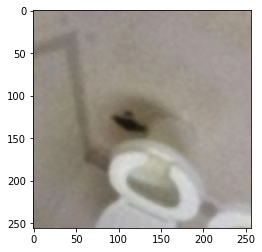

In [59]:
image = joblib.load(f'../input/image_pickles/image13.pkl')

plt.imshow(image)
